# IEEE European Low Voltage Test Feeder: 

http://sites.ieee.org/pes-testfeeders/resources/

The current IEEE test cases are focused on North American style systems; however it is common outside of North America to see low-voltage distribution systems, both radial and meshed. It is important to make sure that tools support both dominant styles of distribution system configuration. This test case seeks to fill a benchmark gap by presenting a number of common low-voltage configurations. This circuit also introduces quasi-static time series simulations.


IEEE European LV network is a generic 0.416 kV network serviced by one 0.8 MVA MV/LV transformer and a 11kV external grid. The network supplies 906 LV buses and 55 single phase loads. The network layout is mostly radial.

# Snapshot of Time series data

In the benchmark document, there are three snapshots taken from a time series data.

- 12:01 AM : Off Peak(1 min) 
- 09:26 AM : On Peak (566 min)
- 12:00 AM : Off Peak (1440 min)

Also, the IEEE benchmark data(.csv) is used to create pandapower network in two ways:
- One way is to use PowerFactory network from csv data and then convert it to pandapower(thru_PF).
- Or create a network directly from csv(from csv).

All of these networks have been saved into pandapower.networks 
We can select them using :
-'thru_PF_off_start','thru_PF_on_mid','thru_PF_off_end' 
-'from_csv_off_start' ,'from_csv_on_mid','from_csv_off_end'  

In [1]:
import pandapower as pp
import pandapower.networks as nw

net = nw.ieee_european_lv_asymmetric('thru_PF_off_start')

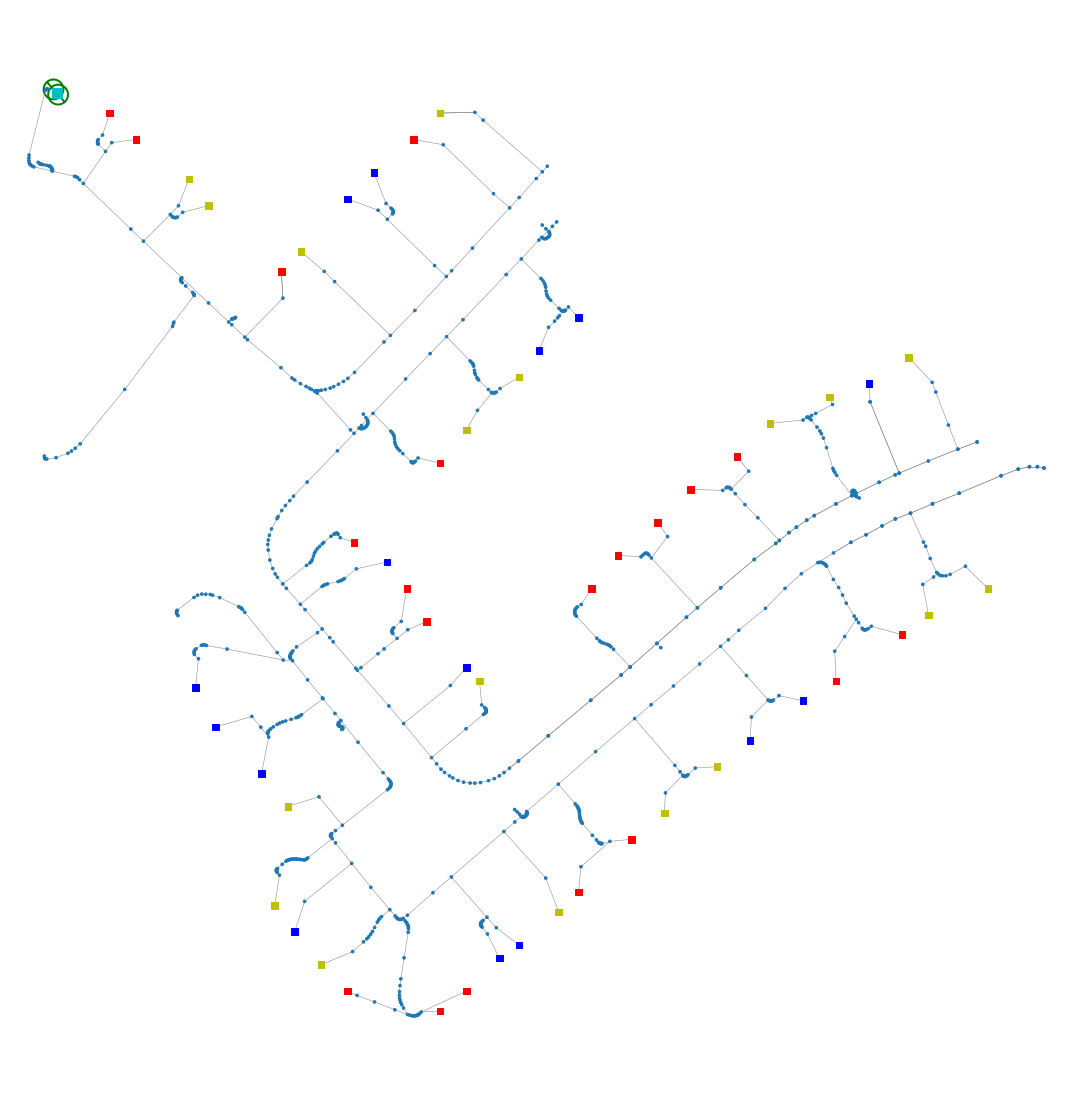

In [2]:
import pandapower.plotting as plot
import numpy as np
try:
    import seaborn
    colors = seaborn.color_palette()
except:
    colors = ["b", "g", "r", "c", "y"]
%matplotlib inline

bc = plot.create_bus_collection(net, net.bus.index, size=.2, color=colors[0], zorder=10)
tlc, tpc = plot.create_trafo_collection(net, net.trafo.index, color="g",size =1.5 )
lcd = plot.create_line_collection(net, net.line.index, color="grey", linewidths=0.5, use_bus_geodata=True)
sc = plot.create_bus_collection(net, net.ext_grid.bus.values, patch_type="rect", size=.75, color="c", zorder=11)
ldA = plot.create_bus_collection(net, net.asymmetric_load.bus.values[np.where(net.asymmetric_load.p_a_mw >0)], patch_type="rect", size=.5, color="r", zorder=11)
ldB = plot.create_bus_collection(net, net.asymmetric_load.bus.values[np.where(net.asymmetric_load.p_b_mw >0)], patch_type="rect", size=.5, color="y", zorder=11)
ldC = plot.create_bus_collection(net, net.asymmetric_load.bus.values[np.where(net.asymmetric_load.p_c_mw >0)], patch_type="rect", size=.5, color="b", zorder=11)
plot.draw_collections([lcd, bc, tlc, tpc, sc,ldA,ldB,ldC], figsize=(15,16))

# Result comparison with IEEE benchmark

- x axis: Buses
- y axis: Voltage magnitude in Volts


- pp_    : pandapower values
- dss_   : IEEE benchmark (OpenDSS values)
- start  : 1 min   snapshot
- mid    : 566 min snapshot
- end   : 1440 min snapshot


# Off Peak (1 min)
<img src="pics/IEEE_european_lv_Snapshot_1min_Initialization_Off Peak.xlsxoverlap_fig.svg" width="70%">

# Difference 

(w.r.t OpenDSS values given in IEEE Benchmark)
<img src="pics/IEEE_european_lv_Snapshot_1min_Initialization_Off Peak.xlsxdiff_fig.svg" width="70%">

#  Peak demand (566 min)
<img src="pics/IEEE_european_lv_Snapshot_566min_On Peak.xlsxoverlap_fig.svg" width="70%">

# Difference 

(w.r.t OpenDSS values given in IEEE Benchmark)
<img src="pics/IEEE_european_lv_Snapshot_566min_On Peak.xlsxdiff_fig.svg" width="70%">

# Off Peak (1440 min)
<img src="pics/IEEE_european_lv_Snapshot_1440min_End.xlsxoverlap_fig.svg" width="70%">

# Difference 

(w.r.t OpenDSS values given in IEEE Benchmark)
<img src="pics/IEEE_european_lv_Snapshot_1440min_End.xlsxdiff_fig.svg" width="70%">